<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/230602__practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numpy, Pandas 복습

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.0 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

In [ ]:
df = pd.read_csv("서울특별시 공공자전거 이용정보(월별)_22.06.csv", encoding='CP949')
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06,3,중랑센터,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,2022-06,3,중랑센터,정기,\N,20대,12,330.13,3.39,14626.81,75
3,2022-06,3,중랑센터,정기,\N,60대,4,113.53,1.02,4410.69,22
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4


In [ ]:
df.isnull().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         16912
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리(M)        0
이용시간(분)        0
dtype: int64

In [ ]:
df['성별'].unique()

array(['\\N', 'M', 'F', nan, 'm', 'f'], dtype=object)

In [ ]:
df['성별'] = df['성별'].fillna('E')
df.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-06,3,중랑센터,일일(비회원),\N,기타,1,29.34,0.26,1140.00,6
1,2022-06,3,중랑센터,일일(회원),M,50대,19,458.11,4.44,19280.00,117
2,2022-06,3,중랑센터,정기,\N,20대,12,330.13,3.39,14626.81,75
3,2022-06,3,중랑센터,정기,\N,60대,4,113.53,1.02,4410.69,22
4,2022-06,3,중랑센터,정기,M,20대,2,13.69,0.07,320.00,4


In [ ]:
df['성별'] = df['성별'].str.upper()
df['성별'].unique()

array(['\\N', 'M', 'F', 'E'], dtype=object)

In [ ]:
#코드 잘 기억하기
df.loc[df['성별']=='\\N','성별'] = 'E'
df['성별'].unique()

array(['E', 'M', 'F'], dtype=object)

<Axes: xlabel='성별', ylabel='이용시간(분)'>

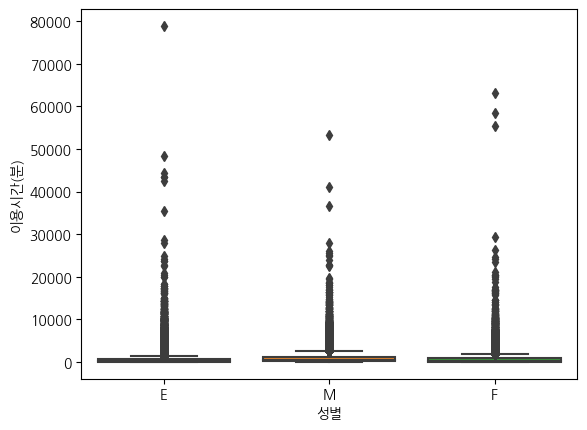

In [ ]:
#이상치 확인
sns.boxplot(x='성별', y ='이용시간(분)', data = df)

In [ ]:
#iqr 이상치 탐색
q1 = df['이용시간(분)'].quantile(0.25)
q2 = df['이용시간(분)'].quantile(0.50)
q3 = df['이용시간(분)'].quantile(0.75)

iqr = q3-q1
iqr

716.0

In [ ]:
outdata = df['이용시간(분)'] > q3 + iqr*1.5

In [ ]:
df[outdata]

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
25,2022-06,102,102. 망원역 1번출구 앞,일일(비회원),E,기타,86,8555.80,77.10,332393.92,3536
28,2022-06,102,102. 망원역 1번출구 앞,일일(회원),E,20대,243,17450.09,162.07,698637.66,7251
38,2022-06,102,102. 망원역 1번출구 앞,일일(회원),F,20대,183,13585.12,132.62,571522.26,6240
39,2022-06,102,102. 망원역 1번출구 앞,일일(회원),F,30대,82,6997.99,72.54,312687.66,2850
45,2022-06,102,102. 망원역 1번출구 앞,일일(회원),M,20대,212,20314.11,169.86,732090.61,6695
...,...,...,...,...,...,...,...,...,...,...,...
132972,2022-06,5854,5854. 신한금융투자 앞,정기,M,40대,267,28595.71,223.56,963473.64,7594
132973,2022-06,5854,5854. 신한금융투자 앞,정기,M,50대,105,17549.66,135.23,582893.19,3848
132976,2022-06,5854,5854. 신한금융투자 앞,정기,M,기타,130,11974.59,93.42,402707.55,2908
133025,2022-06,5855,5855. 하이투자증권 앞,정기,M,30대,107,10235.68,76.27,328998.56,3039


In [ ]:
outdata = df[outdata].index
outdata

Int64Index([    25,     28,     38,     39,     45,     46,     50,     52,
                53,     54,
            ...
            132962, 132963, 132964, 132970, 132971, 132972, 132973, 132976,
            133025, 133026],
           dtype='int64', length=13885)

In [ ]:
#outdata 삭제 - drop -> index를 통한 삭제
df.drop(outdata, inplace=True)

<Axes: >

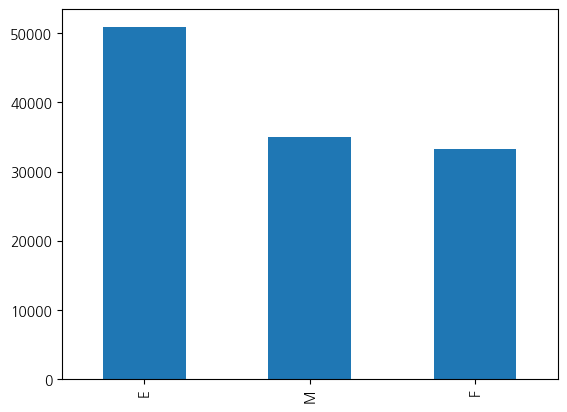

In [ ]:
df['성별'].value_counts().plot(kind='bar')

<ipython-input-20-961e9b29350e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('성별').mean()['이용시간(분)'].plot(kind='bar')


<Axes: xlabel='성별'>

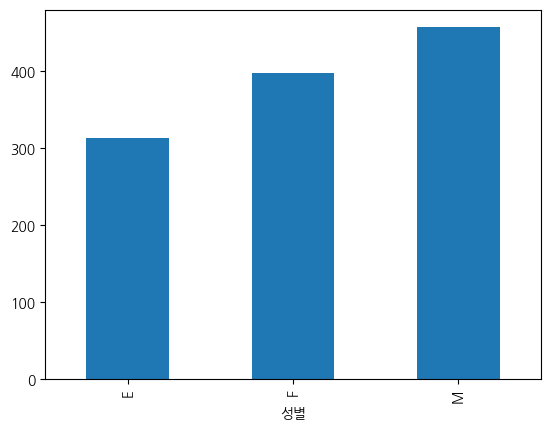

In [ ]:
df.groupby('성별').mean()['이용시간(분)'].plot(kind='bar')

## 대여소 분석

In [ ]:
df.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,88888.영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,99998. 상암단말정비,정기,E,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,99999. 영남단말기정비,정기,E,기타,15,0.00,0.00,0.00,25
133100,2022-06,99999,99999. 영남단말기정비,정기,M,30대,1,14.71,0.11,464.44,9


In [ ]:
#대여소명 전처리
place = []

for temp in df['대여소명']:
  if '.' in temp:
    place.append(temp.split('.')[-1].strip())
  else:
    place.append(temp.strip())

place[-10:]

['상담센터',
 '상담센터',
 '상담센터',
 '상담센터',
 '상담센터',
 '상담센터',
 '영남배송',
 '상암단말정비',
 '영남단말기정비',
 '영남단말기정비']

In [ ]:
df['대여소명'] = place
df.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
133096,2022-06,9999,상담센터,정기,M,기타,4,525.03,3.84,16543.52,109
133097,2022-06,88888,영남배송,정기,M,60대,7,831.71,7.62,32816.68,200
133098,2022-06,99998,상암단말정비,정기,E,20대,1,20.85,0.26,1120.00,11
133099,2022-06,99999,영남단말기정비,정기,E,기타,15,0.00,0.00,0.00,25
133100,2022-06,99999,영남단말기정비,정기,M,30대,1,14.71,0.11,464.44,9


In [ ]:
#문법익히기
df_s = df.pivot_table(df, index='대여소명', aggfunc='sum')
df_s

<ipython-input-25-21255d8689f1>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_s = df.pivot_table(df, index='대여소명', aggfunc='sum')


,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,54570,1755861.43,908,18482
(재)FITI시험연구원,144372,2329756.56,1094,17865
19민주묘지 입구사거리,73696,2500823.89,926,21885
19민주묘지역,76950,1738585.86,572,14857
19민주묘지역 1번출구,98532,3261066.50,994,25505
...,...,...,...,...
흥국사 정류장,37658,586350.67,167,5016
희성오피앙,78672,2948118.96,1015,23900
희훈타워빌 앞,183535,2379489.97,983,20834


In [ ]:
df_no = []

for temp in df_s.index:
  df_no.append(df[df['대여소명']==temp]['대여소번호'].iloc[0])

In [ ]:
df_s['대여소번호'] = df_no

In [ ]:
df_s.head()

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,1070,1755861.43,908,18482
(재)FITI시험연구원,2724,2329756.56,1094,17865
19민주묘지 입구사거리,1568,2500823.89,926,21885
19민주묘지역,1539,1738585.86,572,14857
19민주묘지역 1번출구,1564,3261066.50,994,25505


In [ ]:
df_s.sort_values(by='이용건수', ascending=False).head(10)

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
마곡역1번출구,1151,2740977.43,2788,25354
공항초등학교건너편,1162,2481492.82,2104,22876
마곡수명산 1-2단지,2732,3083222.61,2054,26086
마곡수명산파크 209동 건너편,1192,2534915.57,1956,22357
수명산파크 4단지 411동 앞,2746,2667164.28,1874,22349
천왕역 1번 출입구 앞,1977,3225712.27,1859,23710
우장산동 가곡어린이공원앞,5061,3023201.96,1832,29373
마곡14단지 1408동앞,3785,2500348.05,1821,24815
마곡역 교차로(2번출구),1190,1991077.98,1704,17660


### 지도 시각화

In [ ]:
sinfo_df = pd.read_csv('공공자전거 대여소 정보.csv')
sinfo_df.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081,2015-10-07,20,NaN,LCD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#데이터 전처리
sinfo_df = sinfo_df.iloc[4:,:6]
sinfo_df.head()

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.97406006
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.97466278
7,305.0,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.97833252
8,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.97109985


In [ ]:
sinfo_df.columns = ['대여소번호','이름','소재지','주소','위도','경도']
sinfo_df

,대여소번호,이름,소재지,주소,위도,경도
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.97406006
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.97466278
7,305.0,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.97833252
8,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.97109985
...,...,...,...,...,...,...
2718,3698.0,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.55142593,127.14421082
2719,3699.0,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783
2720,3700.0,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.12257385
2721,3701.0,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.14613342


In [ ]:
#대여소 번호 전환
sinfo_df['대여소번호'] = sinfo_df['대여소번호'].astype('int')
sinfo_df

,대여소번호,이름,소재지,주소,위도,경도
4,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.57579422,126.97145081
5,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.57594681,126.97406006
6,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.57176971,126.97466278
7,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.57255936,126.97833252
8,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.56999969,126.97109985
...,...,...,...,...,...,...
2718,3698,명일역 3번출구 옆,강동구,강동구 명일동 303-7,37.55142593,127.14421082
2719,3699,상일파출소 옆,강동구,강동구 상일동 520-1,37.55655289,127.1658783
2720,3700,강변그대가리버뷰 입구 맞은편,강동구,강동구 천호동 250-7,37.54816437,127.12257385
2721,3701,방아삼거리,강동구,강동구 둔촌동 118-2,37.5232811,127.14613342


In [ ]:
sinfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2719 entries, 4 to 2722
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소번호   2719 non-null   int64 
 1   이름      2719 non-null   object
 2   소재지     2719 non-null   object
 3   주소      2719 non-null   object
 4   위도      2719 non-null   object
 5   경도      2719 non-null   object
dtypes: int64(1), object(5)
memory usage: 127.6+ KB


In [ ]:
df_s.head()

,대여소번호,이동거리(M),이용건수,이용시간(분)
대여소명,,,,
(시립)고덕평생학습관,1070,1755861.43,908,18482
(재)FITI시험연구원,2724,2329756.56,1094,17865
19민주묘지 입구사거리,1568,2500823.89,926,21885
19민주묘지역,1539,1738585.86,572,14857
19민주묘지역 1번출구,1564,3261066.50,994,25505


In [ ]:
#잘못된 위경도 값 예외처리 후, 데이터 합치기
lat = []
lng = []
for temp in df_s['대여소번호']:
  d_no = sinfo_df[sinfo_df['대여소번호']==temp]

  try:
    lat_temp = d_no['위도'].values[0]
    lng_temp = d_no['경도'].values[0]
    lat.append(float(lat_temp))
    lng.append(float(lng_temp))

  except:
    lat.append(37.1)
    lng.append(127.1)

df_s['위도'] = lat
df_s['경도'] = lng

df_s

,대여소번호,이동거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
(시립)고덕평생학습관,1070,1755861.43,908,18482,37.555702,127.157921
(재)FITI시험연구원,2724,2329756.56,1094,17865,37.568485,126.838570
19민주묘지 입구사거리,1568,2500823.89,926,21885,37.647934,127.014572
19민주묘지역,1539,1738585.86,572,14857,37.649673,127.013451
19민주묘지역 1번출구,1564,3261066.50,994,25505,37.649597,127.013847
...,...,...,...,...,...,...
흥국사 정류장,991,586350.67,167,5016,37.656769,126.942009
희성오피앙,1639,2948118.96,1015,23900,37.680313,127.055069
희훈타워빌 앞,3905,2379489.97,983,20834,37.501915,126.889244


In [ ]:
df_s_top10 = df_s.sort_values(by='이용건수', ascending=False).head(10)
df_s_top10

,대여소번호,이동거리(M),이용건수,이용시간(분),위도,경도
대여소명,,,,,,
마곡역1번출구,1151,2740977.43,2788,25354,37.560207,126.824142
공항초등학교건너편,1162,2481492.82,2104,22876,37.562679,126.820473
마곡수명산 1-2단지,2732,3083222.61,2054,26086,37.555309,126.829857
마곡수명산파크 209동 건너편,1192,2534915.57,1956,22357,37.555450,126.826897
수명산파크 4단지 411동 앞,2746,2667164.28,1874,22349,37.551350,126.824936
천왕역 1번 출입구 앞,1977,3225712.27,1859,23710,37.486210,126.838821
우장산동 가곡어린이공원앞,5061,3023201.96,1832,29373,37.555454,126.837517
마곡14단지 1408동앞,3785,2500348.05,1821,24815,37.557373,126.823326
마곡역 교차로(2번출구),1190,1991077.98,1704,17660,37.560501,126.826653


In [ ]:
import folium

In [ ]:
center = [37.565484, 126.977984]
map = folium.Map(location=center, zoom_start=12)
map

In [ ]:
for temp in range(len(df_s_top10)):
  d = df_s_top10.iloc[temp]

  folium.Marker(location=[d['위도'], d['경도']], icon = folium.Icon(color='red'),
                popup = d.name).add_to(map)
map